## Sports Performance Analysis

Analyze a dataset related to sports performance (e.g., player statistics). Use EDA to identify trends and relationships between different metrics. Create visualizations that highlight key insights, such as player performance over time or team comparisons.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Unzipping the file
with zipfile.ZipFile('NBA Players Performance.zip', 'r') as zip_ref:
    zip_ref.extractall('NBA_Players_Performance')

# Get list of all files in the extracted folder
file_list = os.listdir('NBA_Players_Performance')

# Load the first CSV file into a DataFrame
csv_file = [file for file in file_list if file.endswith('.csv')][0]
df = pd.read_csv(f'NBA_Players_Performance/{csv_file}')

# Display the first few rows to inspect the data
print(df.head())

   Unnamed: 0  GP  Games played  GS  Games started  MPG  Minutes Per Game  \
0           0                19                  0                   21.3   
1           1                19                  2                   18.1   
2           2                20                  3                   23.6   
3           3                18                  1                   14.8   
4           4                19                  0                   13.7   

   OREB  Offensive Rebounds  DREB  Defensive Rebounds  REB  Total Rebounds  \
0                       6.0                      31.0                 37.0   
1                       4.0                      31.0                 35.0   
2                       6.0                      30.0                 36.0   
3                       5.0                      28.0                 33.0   
4                       8.0                      26.0                 34.0   

   RPG  Rebounds Per Game  AST  Total Assists  APG  Assists Per Game

In [5]:
# Initial Data Exploration

# Check the basic information and data types of each column
print("\nData Types and Non-Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# View basic statistics of numerical columns
print("\nSummary Statistics for Numerical Columns:\n")
print(df.describe())

# Display unique values in categorical columns
categorical_columns = df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

# Check for duplicate player entries (if there's a player identifier like 'Player Name')
if 'Player Name' in df.columns:
    player_duplicates = df[df['Player Name'].duplicated()]
    print(f"\nNumber of duplicate player names: {len(player_duplicates)}")


Data Types and Non-Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  279 non-null    int64  
 1   GP  Games played            279 non-null    int64  
 2   GS  Games started           279 non-null    int64  
 3   MPG  Minutes Per Game       29 non-null     float64
 4   OREB  Offensive Rebounds    29 non-null     float64
 5   DREB  Defensive Rebounds    29 non-null     float64
 6   REB  Total Rebounds         29 non-null     float64
 7   RPG  Rebounds Per Game      29 non-null     float64
 8   AST  Total Assists          250 non-null    float64
 9   APG  Assists Per Game       250 non-null    float64
 10  TO  Turnovers               250 non-null    float64
 11  TOPG  Turnovers Per Game    250 non-null    float64
 12  A/TO  Assists Per Turnover  250 non-null    float64
 13  P

In [ ]:
# Clean Data

In [7]:
# Drop columns with excessive missing values (e.g., more than 80% missing)
# # MPG, OREB, DREB, REB, RPG) have very high numbers of missing values—250 out of 279 entries are missing, indicating that these metrics were not consistently recorded.
columns_to_drop = ['MPG  Minutes Per Game', 'OREB  Offensive Rebounds', 'DREB  Defensive Rebounds', 
                   'REB  Total Rebounds', 'RPG  Rebounds Per Game']
df.drop(columns=columns_to_drop, inplace=True)

# Fill remaining missing values with mean for numerical columns
# AST, APG, TO, TOPG, A/TO also have some missing values (29 missing entries).
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [9]:
# Print column names to verify them
print(df.columns)

Index(['Unnamed: 0', 'GP  Games played', 'GS  Games started',
       'AST  Total Assists', 'APG  Assists Per Game', 'TO  Turnovers',
       'TOPG  Turnovers Per Game', 'A/TO  Assists Per Turnover', 'Player',
       'Position', 'Team'],
      dtype='object')


In [11]:
# Drop Unnecessary Columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Code to Standardize Team Names

team_mapping = {
    'MIL': 'Milwaukee Bucks', 'PHI': 'Philadelphia 76ers', 'MEM': 'Memphis Grizzlies',
    'GS': 'Golden State Warriors', 'NY': 'New York Knicks', 'CHI': 'Chicago Bulls',
    'ORL': 'Orlando Magic', 'DEN': 'Denver Nuggets', 'CLE': 'Cleveland Cavaliers',
    'MIN': 'Minnesota Timberwolves', 'NO': 'New Orleans Pelicans', 'ATL': 'Atlanta Hawks',
    'PHO': 'Phoenix Suns', 'BKN': 'Brooklyn Nets', 'TOR': 'Toronto Raptors',
    'HOU': 'Houston Rockets', 'LAL': 'Los Angeles Lakers', 'OKC': 'Oklahoma City Thunder',
    'SAC': 'Sacramento Kings', 'LAC': 'Los Angeles Clippers', 'DET': 'Detroit Pistons',
    'IND': 'Indiana Pacers', 'DAL': 'Dallas Mavericks', 'UTA': 'Utah Jazz',
    'BOS': 'Boston Celtics', 'SA': 'San Antonio Spurs', 'MIA': 'Miami Heat',
    'CHA': 'Charlotte Hornets', 'WAS': 'Washington Wizards', 'POR': 'Portland Trail Blazers'
}
df['Team'] = df['Team'].replace(team_mapping)

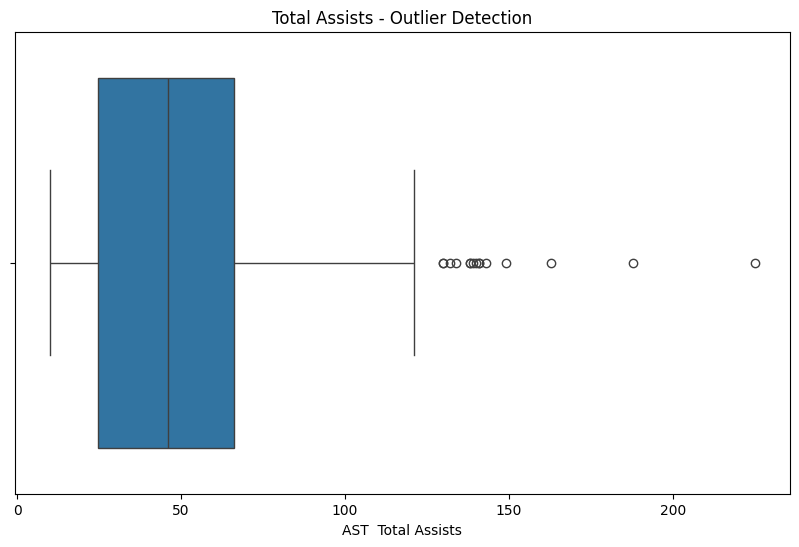

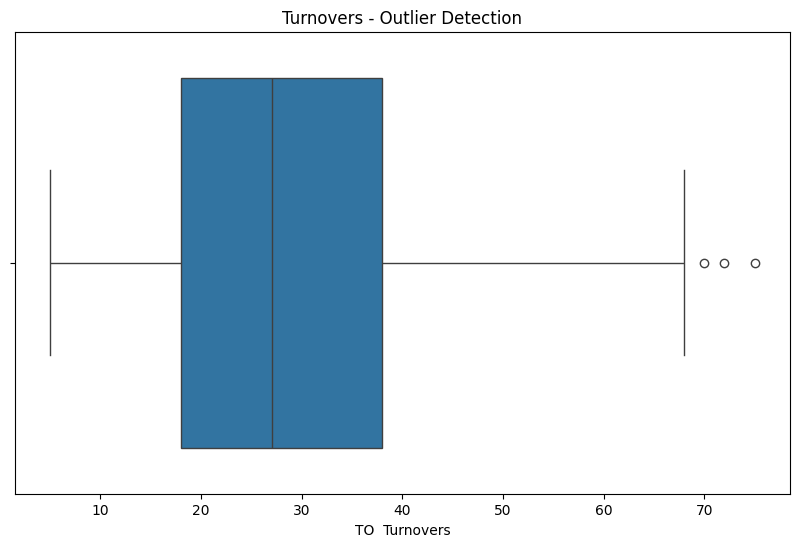

In [15]:
# Code for Outlier Detection

# Boxplot to detect outliers in 'AST'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AST  Total Assists'])
plt.title('Total Assists - Outlier Detection')
plt.show()

# Boxplot to detect outliers in 'TO'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TO  Turnovers'])
plt.title('Turnovers - Outlier Detection')
plt.show()

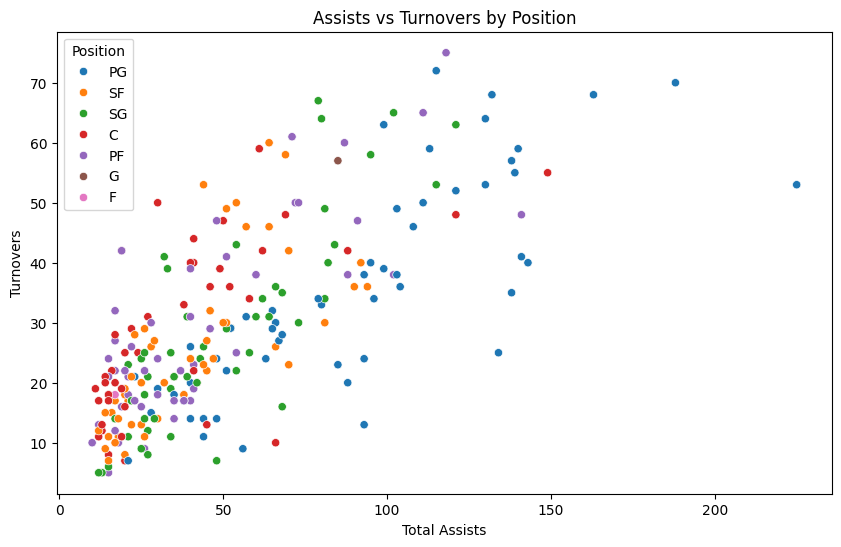

In [17]:
#  Data Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AST  Total Assists', y='TO  Turnovers', hue='Position', data=df)
plt.xlabel('Total Assists')
plt.ylabel('Turnovers')
plt.title('Assists vs Turnovers by Position')
plt.show()

C:\Users\milto\AppData\Local\Temp\ipykernel_22860\629261320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='APG  Assists Per Game', data=avg_ast_position, palette='viridis')


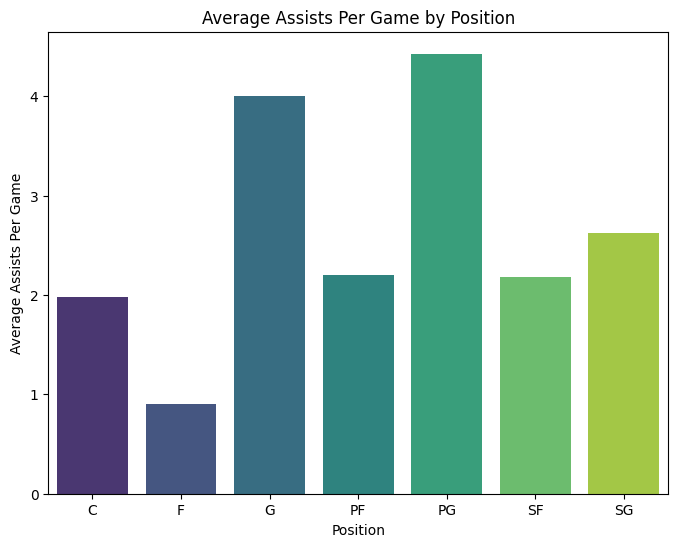

In [19]:
avg_ast_position = df.groupby('Position')['APG  Assists Per Game'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Position', y='APG  Assists Per Game', data=avg_ast_position, palette='viridis')
plt.xlabel('Position')
plt.ylabel('Average Assists Per Game')
plt.title('Average Assists Per Game by Position')
plt.show()

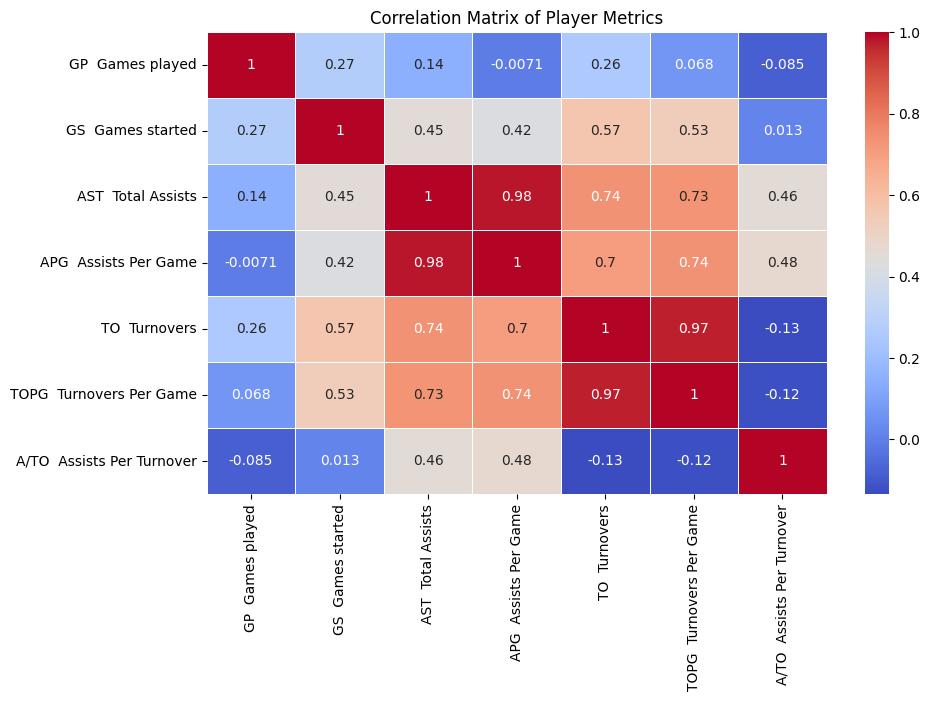

In [21]:
# Select numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Player Metrics')
plt.show()